In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules 
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_tubes = pd.read_excel('/content/drive/My Drive/Dataset/x_damin.xlsx')
y_tubes = pd.read_csv('/content/drive/My Drive/Dataset/y_damin.csv')

In [ ]:
data = x_tubes.copy()
corr = data.corr()

In [ ]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,4.981210e+05,4.981210e+05,4.981210e+05,498121.000000
mean,3.503257,915.608772,18.856831,5.495926,5.001281,2.499015,8.320717e+11,4.302878e+12,8.006081e+12,0.047633
std,1.707662,528.772880,29.511867,3.447683,3.163795,1.708182,1.611261e+13,3.845879e+13,4.049927e+13,0.212989
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.461496e-04,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,458.000000,1.080000,3.000000,2.000000,1.000000,8.498584e-03,2.734761e-02,3.846154e-02,0.000000
50%,4.000000,916.000000,2.730000,5.000000,5.000000,2.000000,1.676338e-02,5.460687e-02,2.222222e-01,0.000000
75%,5.000000,1374.000000,32.740000,8.000000,8.000000,4.000000,3.325123e-02,1.094419e-01,5.294118e-01,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,9.666667e+14,9.993333e+14,3.666667e+14,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
 9   fraud                      498121 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB


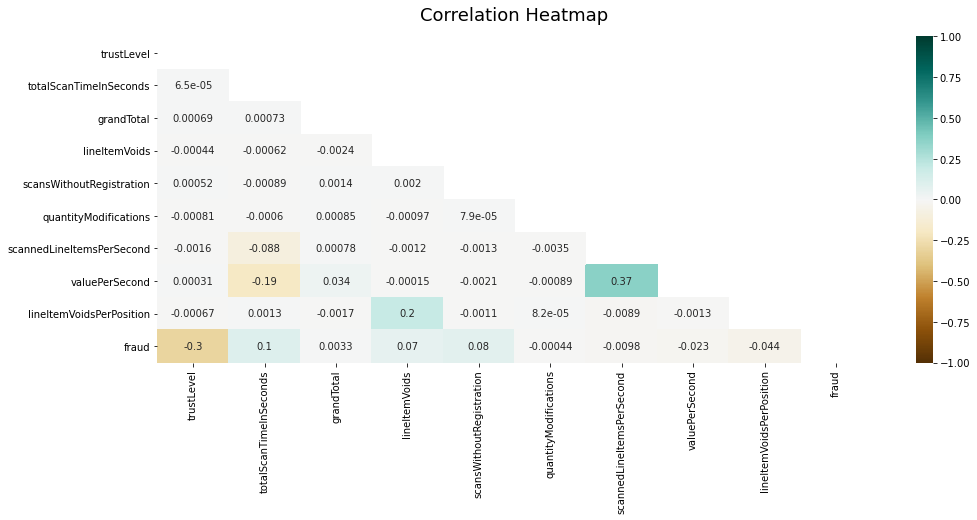

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

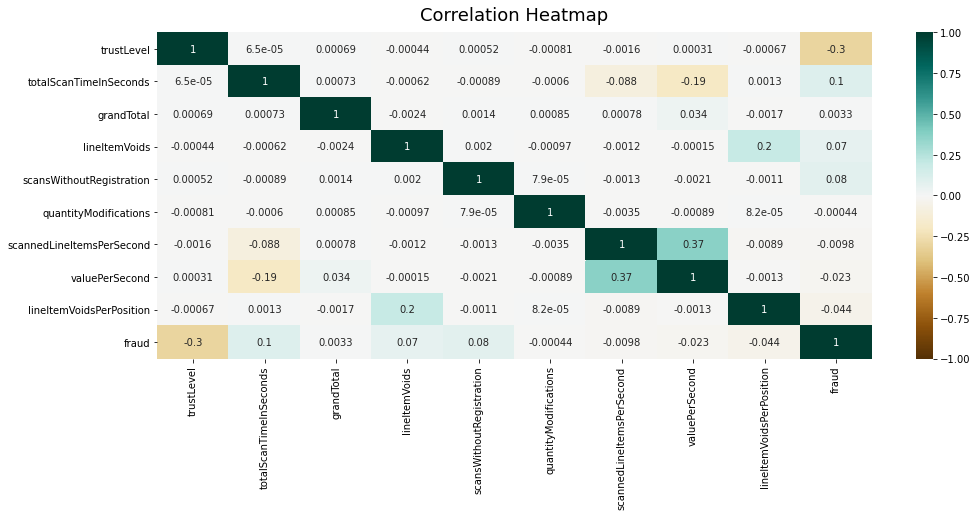

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [ ]:
corr = data.corr()
corr

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.000065,0.000690,-0.000436,0.000518,-0.000806,-0.001649,0.000308,-0.000667,-0.299178
totalScanTimeInSeconds,0.000065,1.000000,0.000734,-0.000619,-0.000886,-0.000602,-0.088432,-0.187608,0.001253,0.101605
grandTotal,0.000690,0.000734,1.000000,-0.002432,0.001393,0.000854,0.000782,0.033683,-0.001742,0.003275
lineItemVoids,-0.000436,-0.000619,-0.002432,1.000000,0.001962,-0.000974,-0.001164,-0.000149,0.199080,0.069627
scansWithoutRegistration,0.000518,-0.000886,0.001393,0.001962,1.000000,0.000079,-0.001280,-0.002136,-0.001079,0.080411
quantityModifications,-0.000806,-0.000602,0.000854,-0.000974,0.000079,1.000000,-0.003478,-0.000888,0.000082,-0.000437
scannedLineItemsPerSecond,-0.001649,-0.088432,0.000782,-0.001164,-0.001280,-0.003478,1.000000,0.370087,-0.008901,-0.009770
valuePerSecond,0.000308,-0.187608,0.033683,-0.000149,-0.002136,-0.000888,0.370087,1.000000,-0.001253,-0.022943
lineItemVoidsPerPosition,-0.000667,0.001253,-0.001742,0.199080,-0.001079,0.000082,-0.008901,-0.001253,1.000000,-0.044210
fraud,-0.299178,0.101605,0.003275,0.069627,0.080411,-0.000437,-0.009770,-0.022943,-0.044210,1.000000


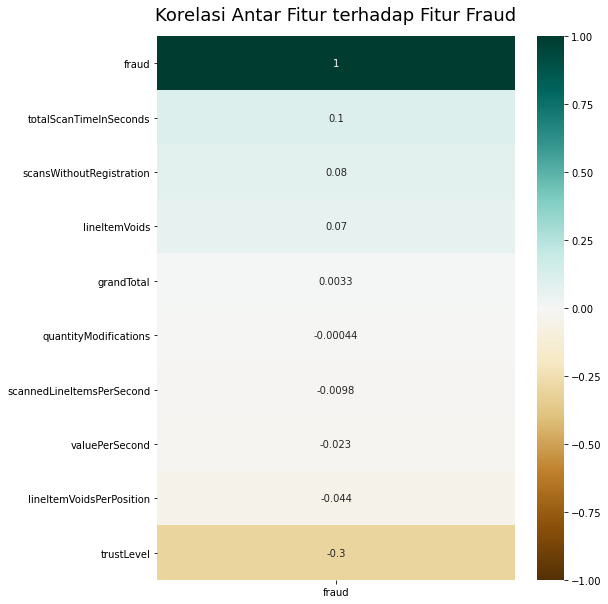

In [ ]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(corr[['fraud']].sort_values(by='fraud', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Antar Fitur terhadap Fitur Fraud', 
                  fontdict={'fontsize':18}, pad=16);

# **Data Preprocessing - All Columns**



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=474394 (95.237%)
Class=1, n=23727 (4.763%)


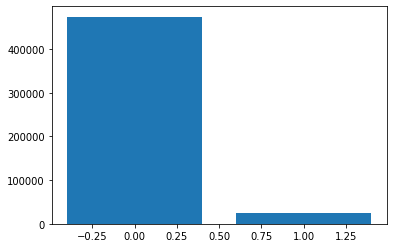

In [ ]:
data_x = x_tubes.loc[:, x_tubes.columns != 'fraud']
data_y = y_tubes.copy()
data_y = LabelEncoder().fit_transform(data_y)
counter = Counter(data_y)
for k,v in counter.items():
	per = v / len(data_y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=474394 (50.000%)
Class=1, n=474394 (50.000%)


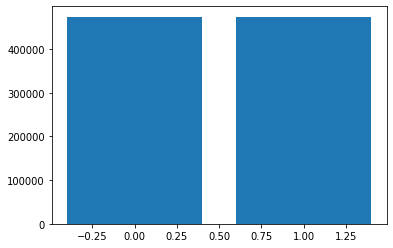

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(data_x, data_y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
col_X = data_x.columns
col_y = y_tubes.columns
X_all = pd.DataFrame(X,columns = col_X)
y_all = pd.DataFrame(y,columns = col_y)

# **Data Preprocessing - Selected Data**

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=474394 (50.000%)
Class=1, n=474394 (50.000%)


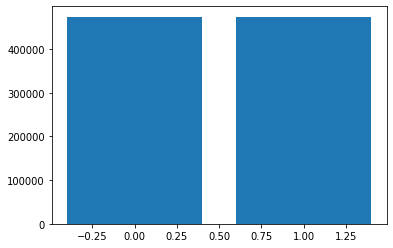

In [ ]:
data_xs = x_tubes.loc[:, x_tubes.columns != 'fraud']
data_xs = data_xs.drop(['grandTotal', 'quantityModifications', 
                        'scannedLineItemsPerSecond'], axis=1)
data_ys = y_tubes.copy()
data_ys = LabelEncoder().fit_transform(data_ys)
oversample = SMOTE()
Xs, ys = oversample.fit_resample(data_xs, data_ys)
# summarize distribution
counter = Counter(ys)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
col_X = data_xs.columns
col_y = y_tubes.columns
X_sel = pd.DataFrame(Xs,columns = col_X)
y_sel = pd.DataFrame(ys,columns = col_y)

# **Klasifikasi - Decission Tree - All Features**

In [ ]:
parameters = {'max_depth':range(3,20)}
model = GridSearchCV(tree.DecisionTreeClassifier(), 
                     parameters, n_jobs=-1)
model.fit(X=X_all, y=y_all)
tree_model = model.best_estimator_
print (model.best_score_, model.best_params_)

0.9930859209363885 {'max_depth': 19}


In [ ]:
def get_score(model,X_train, X_test, y_train, y_test, meanab):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)
  ytest = y_test
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt=".0f", ax=ax)
  plt.xlabel("y_head")
  plt.ylabel("y_true")
  plt.show()
  print (classification_report(ytest, ypred))
  print ("Mean Absolute Error Fold ke-{} : {}".format(i,MAE(ytest, ypred)))
  meanab.append(MAE(ytest, ypred))
  return model.score(X_test, y_test)

Fold ke 1


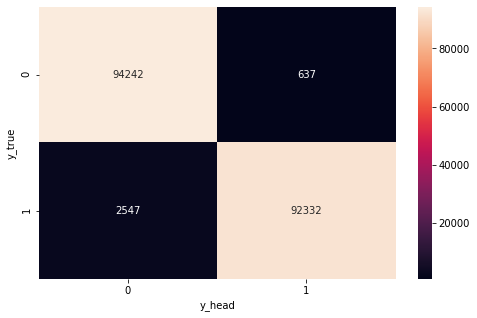

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     94879
           1       0.99      0.97      0.98     94879

    accuracy                           0.98    189758
   macro avg       0.98      0.98      0.98    189758
weighted avg       0.98      0.98      0.98    189758

Mean Absolute Error Fold ke-1 : 0.016779266223294932
Fold ke 2


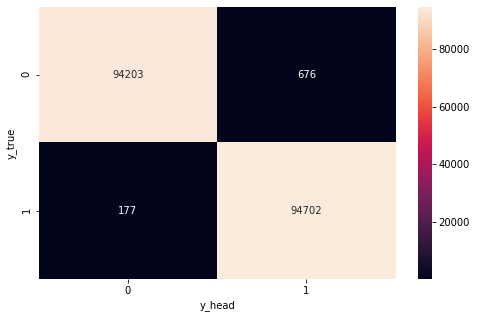

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94879
           1       0.99      1.00      1.00     94879

    accuracy                           1.00    189758
   macro avg       1.00      1.00      1.00    189758
weighted avg       1.00      1.00      1.00    189758

Mean Absolute Error Fold ke-2 : 0.004495199148389001
Fold ke 3


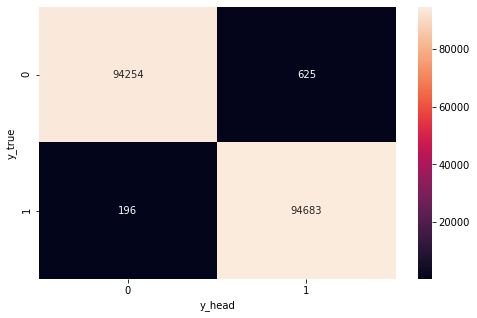

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94879
           1       0.99      1.00      1.00     94879

    accuracy                           1.00    189758
   macro avg       1.00      1.00      1.00    189758
weighted avg       1.00      1.00      1.00    189758

Mean Absolute Error Fold ke-3 : 0.00432656330694885
Fold ke 4


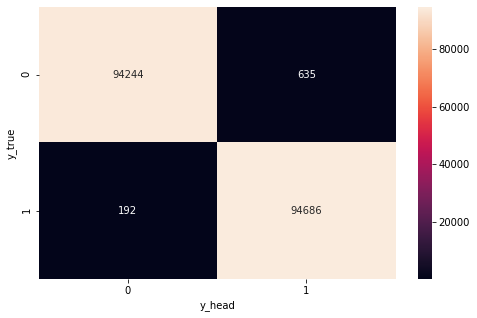

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94879
           1       0.99      1.00      1.00     94878

    accuracy                           1.00    189757
   macro avg       1.00      1.00      1.00    189757
weighted avg       1.00      1.00      1.00    189757

Mean Absolute Error Fold ke-4 : 0.004358205494395463
Fold ke 5


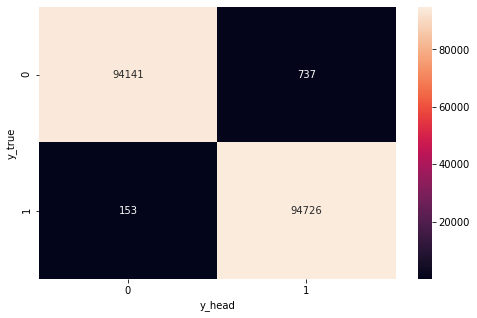

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94878
           1       0.99      1.00      1.00     94879

    accuracy                           1.00    189757
   macro avg       1.00      1.00      1.00    189757
weighted avg       1.00      1.00      1.00    189757

Mean Absolute Error Fold ke-5 : 0.004690209056846388


In [ ]:
folds = StratifiedKFold(n_splits = 5)
ytest = []
ypred = []
score = []
MAE_score = []
i = 1

for train_index, test_index in folds.split (X_all, y_all):
  X_train = X_all.iloc[train_index].loc[:]
  X_test = X_all.iloc[test_index].loc[:]
  y_train = y_all.iloc[train_index].loc[:]
  y_test = y_all.iloc[test_index].loc[:]
  print("Fold ke {}".format(i))
  score.append(get_score(tree.DecisionTreeClassifier(max_depth=19),X_train, X_test, y_train, y_test, MAE_score))
  i = i + 1

In [ ]:
print(sum(score)/5)

0.993070111354025


In [ ]:
print(sum(MAE_score)/5)

0.006929888645974927


# **Klasifikasi - Decission Tree - Selected Features**

In [ ]:
parameters = {'max_depth':range(3,20)}
model = GridSearchCV(tree.DecisionTreeClassifier(),
                     parameters, n_jobs=-1)
model.fit(X=X_sel, y=y_sel)
tree_model = model.best_estimator_
print (model.best_score_, model.best_params_) 

In [ ]:
def get_score(model,X_train, X_test, y_train, y_test, mae_score):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)
  ytest = y_test
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt=".0f", ax=ax)
  plt.xlabel("y_head")
  plt.ylabel("y_true")
  plt.show()
  print (classification_report(ytest, ypred))
  print ("Mean Absolute Error Fold ke-{} : {}".format(i,MAE(ytest, ypred)))
  mae_score.append(MAE(ytest, ypred))
  return model.score(X_test, y_test)

In [ ]:
folds = StratifiedKFold(n_splits = 5)
ytest = []
ypred = []
score = []
MAE_score = []
i = 1

for train_index, test_index in folds.split (X_all, y_all):
  X_train = X_all.iloc[train_index].loc[:]
  X_test = X_all.iloc[test_index].loc[:]
  y_train = y_all.iloc[train_index].loc[:]
  y_test = y_all.iloc[test_index].loc[:]
  print("Fold ke {}".format(i))
  score.append(get_score(tree.DecisionTreeClassifier(max_depth=19),
                         X_train, X_test, y_train, y_test, MAE_score))
  i = i + 1

In [ ]:
print(sum(score)/5)

In [ ]:
print(sum(MAE_score)/5)

# **Aturan Asosiasi**

In [ ]:
aturan = X_all.copy()
aturan = aturan.join(y_all)
aturan = aturan.reset_index(drop=True)
aturan.info()

In [ ]:
count = len(aturan)/4
data1 = aturan[aturan['fraud']==0].sample(int(count))
data2 = aturan[aturan['fraud']==1].sample(int(count))
aturan = data1.append(data2, ignore_index = True)
aturan.info()

In [ ]:
col = aturan.columns
skip_col = ['trustLevel', 'fraud']
for i in range (len(col)):
  if col[i] not in skip_col:
    temp = aturan[col[i]].describe()
    min, Q1, Q3, max = temp['min']-1,temp['25%'],temp['75%'],temp['max']+1
    aturan[col[i]] = pd.cut(aturan[col[i]], bins=[min,Q1,Q3,max], labels=['lo','med','hi'])
aturan.head(10)

In [ ]:
aturan["trustLevel"] = aturan["trustLevel"].astype("int64")

In [ ]:
enc = OneHotEncoder()
kategori = ['trustLevel','totalScanTimeInSeconds','grandTotal','lineItemVoids',
            'scansWithoutRegistration','quantityModifications','scannedLineItemsPerSecond',
            'valuePerSecond','lineItemVoidsPerPosition','fraud']
enc.fit(aturan[kategori])
onehot = pd.DataFrame(data=enc.transform(aturan[kategori]).toarray(),
                      columns=enc.get_feature_names(kategori))
aturan = onehot

In [ ]:
# creating Frequent Item Set
frq_items = apriori(aturan, min_support = 0.1, use_colnames = True) 
frq_items['lenght'] = frq_items['itemsets'].apply(lambda x: len(x))
print(len(frq_items))
frq_items.head(10)

In [ ]:
frq_items.tail(10)

In [ ]:
# Rule generation 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(len(rules))
rules.head(10)

In [ ]:
i =190
print(rules['antecedents'][i],rules['consequents'][i])

In [ ]:
rule = rules.copy()
rule = rule.reset_index(drop=True)
fraud = []
for i in range (len(rule)):
  if 'fraud_1' in rule['antecedents'][i] or 'fraud_1' in rule['consequents'][i]:
    fraud.append(i)
a = rule.iloc[fraud, :]

In [ ]:
a.head(10)

In [ ]:
i = [0,2,3]
for j in range (len(i)):
  idx = i[j]
  print("{}. {} -> {} ".format(idx,a['antecedents'][idx],a['consequents'][idx]))

In [ ]:
rule = rules.copy()
rule = rule.reset_index(drop=True)
fraud = []
for i in range (len(rule)):
  if 'fraud_0' in rule['antecedents'][i] or 'fraud_0' in rule['consequents'][i]:
    fraud.append(i)
a = rule.iloc[fraud, :]

In [ ]:
a.head(10)

In [ ]:
i = [1,46,90]
for j in range (len(i)):
  idx = i[j]
  print("{}. {} -> {} ".format(idx,a['antecedents'][idx],a['consequents'][idx]))